# Introduction à l'apprentissage automatique par le calcul de régression linéaire

Le calcul d'une régression linéaire est l'occasion d'expérimenter des premiers calculs d'apprentissages automatiques (en anglais *machine learning*).

Dans ce texte, nous nous limitons à un recherche à un seul facteur, ici il s'agit de trouver la corrélation entre les loyers d'un appartement et leur surface.

Nous commençons par rappeler la calcul classique des paramètres d'une regression linéaire par les outils statistiques. Puis nous utilisons la méthode exposée dans le [cahier précédant](./01_regression_lineaire.ipynb) et venant des vidéos de la chaîne youtube [Machine Learnia](https://www.youtube.com/watch?v=K9z0OD22My4&list=PLO_fdPEVlfKqUF5BPKjGSh7aV9aBshrpY&index=2). On peut aussi aller voir la solution montrée sur le blog de Thibault [Miximum](https://www.miximum.fr/blog/premiers-tests-avec-le-machine-learning/), qui a été ma première lecture. Cette solution est écrite en javascript, mais n'utilise pas autant toutes les possibilités offerte par une extension comme NumPy pour le calcul matriciel. 

 Ce cahier introduit présente déjà les phases principales de la méthode de résolution plus évoluée qui sera présentée dans un autre cahier dédié à l'extension [SciKit Learn](https://scikit-learn.org/stable/index.html).


Dans son blog, Thibault propose comme fichier de données, les loyers des appartements à Montpellier en 1995 en fonction de leur surface. Ce [fichier](loyers_montpellier_2015.csv) a été recopié sur ce répertoire. Il a été obtenu par Thibault sur le site de  [l'observatoire national des loyers](https://www.data.gouv.fr/fr/datasets/resultats-nationaux-des-observatoires-locaux-des-loyers/).

Je lis ce fichier en utilisant l'extension [pandas](https://pandas.pydata.org/).

In [30]:
import pandas as pd
df = pd.read_csv('loyers_montpellier_2015.csv')
df[:5]

,surface,loyer_mensuel
0,25,370
1,25,370
2,26,430
3,26,423
4,26,424


On afficher ces données sous formes d'un nuage de points (voir [ici](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour plus d'information). La commande `regplot` de l'extension [seaborn](https://www.geeksforgeeks.org/python-seaborn-regplot-method/) affiche directement le nuage de point et sa droite de régression.

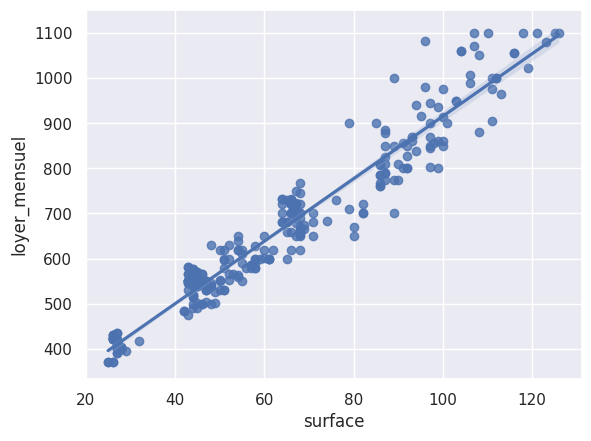

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# style seaborn
sns.set_theme(style="darkgrid")

# plt.plot(df['surface'], df['loyer_mensuel'], 'bo')
sns.regplot(x='surface',y='loyer_mensuel', data=df)
plt.show()


Nous allons maintenant recalculer les coefficients de cette droite de régression.

# Résolution en utilisant l'extension `statistics`

Les [calculs théoriques](https://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire) donne l'équation de droite de régression linéaire.

$$ y = \beta_0 + \beta_1 \times x $$

et les coefficients sont donnés par les équations suivantes.

$$
\begin{array}{ll}
\beta_1 & = \text{cov}(X,Y) / \text{var}(X) \\
\beta_0 & = \bar{y} - \beta_1 \times \bar{x} \\
\end{array}
$$

avec la définition usuelle des moyennes ($\bar{y}$, $\bar{y}$), de la covariance et de la variance.

$$
\begin{align*}
&\bar{x}         = \frac{1}{n} \sum_{i=1}^n x_i \\
&\text{var}(X)   = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2 \\
&\text{cov}(X,Y) = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) \\ 
\end{align*}
$$

L'extension [statistics](https://docs.python.org/3/library/statistics.html) permet de faire ces calculs directement avec la commande [linear_regression](https://docs.python.org/fr/dev/library/statistics.html?highlight=linear_regression#statistics.linear_regression). Par contre, il faudra auparavant traduire les données de mon dataframe en listes.

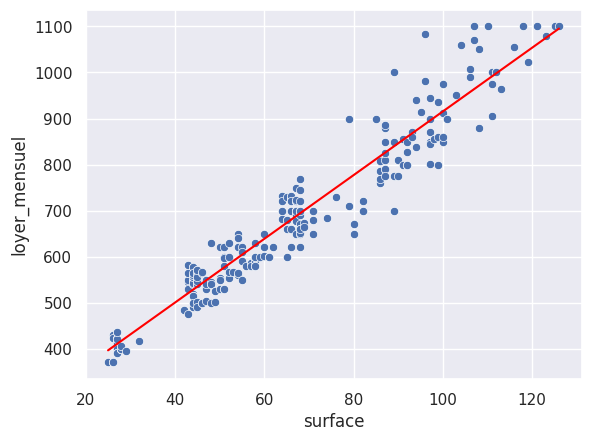

In [32]:
import statistics as stat
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Je convertis les séries Pandas en listes pour les utiliser dans l'extension 'statistics'
surfaces = df['surface'].tolist()
loyers = df['loyer_mensuel'].tolist()
slope, intercept = stat.linear_regression(surfaces, loyers)

# Je construis ensuite les prédictions de la droite de régression.
# (pour pouvoir multiplier le vecteur surfaces par un float, il faut convertir ses éléments en float)
# stat_predict = np.float_(surfaces) * slope + intercept
# ou passer en nd array explictement
stat_predict = np.array(surfaces) * slope + intercept

# je définis un style seaborn un peu plus sympa
sns.set_theme(style="darkgrid")

# j'affiche (uniquement) le nuage de points
sns.scatterplot(x=df['surface'], y=df['loyer_mensuel'])

# j'affiche la ligne de régression
sns.lineplot(x=df['surface'],y=stat_predict, color='red')
plt.show()

La commande [stats.linregress](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html) du module SciPy fait la même chose en donnant quelques résultats supplémentaires (comme l'erreur standard). Pour être sûr d'avoir un résultat, je convertis ici les colonnes du dataframe en ndarray.

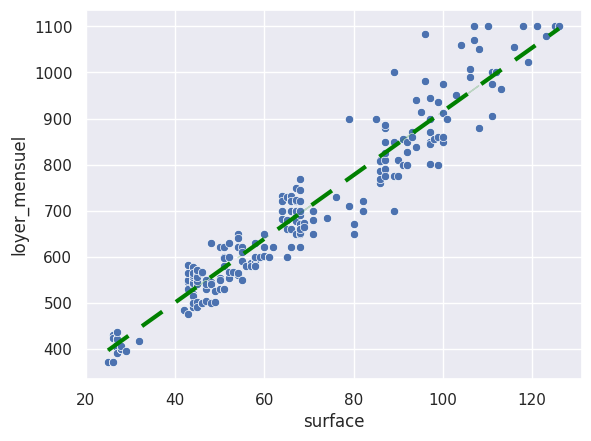

In [33]:
from scipy.stats import linregress

# conversion des colonnes du dataframe en ndarray
# x = np.array(surfaces)
# y = np.array(loyers)
x = df['surface'].to_numpy()
y = df['loyer_mensuel'].to_numpy()

sci_regres = linregress(x,y)
sci_predict = sci_regres.slope * x + sci_regres.intercept

# j'affiche le nuage de points (le dataframe permet d'avoir les titres des axes)
sns.scatterplot(x=df['surface'], y=df['loyer_mensuel'])

# j'affiche la ligne de régression
sns.lineplot(x=x,y=sci_predict, color='green', lw=3, dashes=[6,4])
plt.show()


# Faire une régression par la méthode du gradient avec Numpy

Le [cahier précédant](./00_concepts.ipynb) a présenté l'approche générale de l'apprentissage automatique en prenant justement comme exemple une régression linéaire. Je reprends ici la méthode qui a été expliquée en utilisant le capacités de calcul matriciel donné par [NumPy](https://courspython.com/tableaux-numpy.html). Et l'avantage est que je peux comparer avec la solution donnée par SciPy dans le paragraphe précédant.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

On commence par reprendre le `dataframe` précédant pour le convertir en un vecteur objectif `y` et une matrice d'échantillon `X`.

In [35]:
x = df['surface'].to_numpy()
y = df['loyer_mensuel'].to_numpy()
print(x.shape, y.shape)
L = len(y)

(303,) (303,)


La cellule suivante permet de tester l'effet de la normalisation des données.

In [36]:
preprocessing = True     # indiquer ici si on veut normaliser les données
if preprocessing:
    x_min = x.min()
    x_range = x.max() - x_min
    y_min = y.min()
    y_range = y.max() - y_min

    def transf(x, y):         
        return (x - x_min) / x_range , (y - y_min) / y_range

    def inv_transf(x,y):        
        return x * x_range + x_min, y * y_range + y_min
    
    def inv_transf_y(y):        
        return y * y_range + y_min

    # ces fonctions sont définies à la va-vite, on trouvera mieux ici:
    # voir https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform
    x,y = transf(x, y)


Visualisons le début de ces données pour vérifier que tout s'est bien passé.

In [37]:
from tabulate import tabulate

x_vis = np.hstack(('surface',x[:5]))
y_vis = np.hstack(('loyer',y[:5]))

print(tabulate((x_vis, y_vis), tablefmt='rounded_grid'))

╭─────────┬───┬───┬────────────┬────────────┬────────────╮
│ surface │ 0 │ 0 │ 0.00990099 │ 0.00990099 │ 0.00990099 │
├─────────┼───┼───┼────────────┼────────────┼────────────┤
│ loyer   │ 0 │ 0 │ 0.0821918  │ 0.0726027  │ 0.0739726  │
╰─────────┴───┴───┴────────────┴────────────┴────────────╯


Les colonnes ont été traduites en `ndarray`, précédemment, mais attention, leur dimensions ne sont pas complètes quand il s'agit de vecteur de dimension 1. Pour les méthodes matricielles qui vont suivre, `y` devra être de dimension `(303,1)` et `X` de dimension `(303,2)` (`303` est le nombre de lignes du tableau d'origine).

In [38]:
# préparation de y qui doit être de dimension (303,1)
y = np.reshape(y,(L,1))

# préparation de X en ajoutant une colonne de 1
X = np.hstack((np.ones((L,1)),np.reshape(x,(L,1))))

print(f'y.shape={y.shape} / x.shape = {x.shape} / X.shape = {X.shape} / X[1,:]= {X[1,:]}')
# y[:3]

y.shape=(303, 1) / x.shape = (303,) / X.shape = (303, 2) / X[1,:]= [1. 0.]


On initialise les paramètres $\theta$ du modèle avec des valeurs aléatoires.

In [39]:
if preprocessing:
    rng = np.random.default_rng(6)
    theta = rng.random((2,1))    
else:
    theta = np.array([10., 10.]).reshape(2,1)
    
inverted = False # see later, for last cell of this chapter

print(np.around(theta, 3))

theta.shape

[[0.538]
 [0.343]]


(2, 1)

Le modèle sera ici la droite de régression. L'objectif est de retrouver ses paramètres $\theta$. 

Comme nous l'avons vu dans le [cahier précédant](./00_concepts.ipynb) nous  utilisons le produit matriciel [dot](https://numpy.org/doc/1.21/reference/generated/numpy.ndarray.dot.html) (il existe aussi la forme [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)).

In [40]:
def model(X, theta):
    return X.dot(theta)

print(model(X, theta).shape)
print(model(X, theta)[:3,0])

# visualisation du modèle choisi au hasard...
show_graph = False
if show_graph:
    # le nuage de points
    plt.scatter(x=df['surface'], y=df['loyer_mensuel'])
    # la ligne de régression de scipy
    plt.plot(df['surface'],sci_predict, color='green', lw=3, dashes=[6,4])
    
    # retransformer les points
    
    plt.plot(X[:,0], model(X,theta), color='r', linewidth=3)
    
    ax = plt.gca()
    ax.set_xlabel('surface')
    ax.set_ylabel('loyer')
    plt.show()

(303, 1)
[0.53816435 0.53816435 0.54156307]


La fonction de coût

In [41]:
def cost_function(X, y, theta):
    m = y.shape[0]
    return 1 / (2*m) * np.sum(np.square(model(X,theta) -y))

cost_function(X, y, theta)

0.05141305616046085

Son gradient

In [42]:
def grad(X,y,theta):
    m = y.shape[0]
    return 1/m * X.T.dot(model(X, theta) -y)

grad(X,y,theta)

array([[0.27461016],
       [0.06301606]])

La fonction de descente du gradient

In [43]:
def gradient_descent(X,y,theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

On peut maintenant appliquer l'algorithme de descente du gradient.

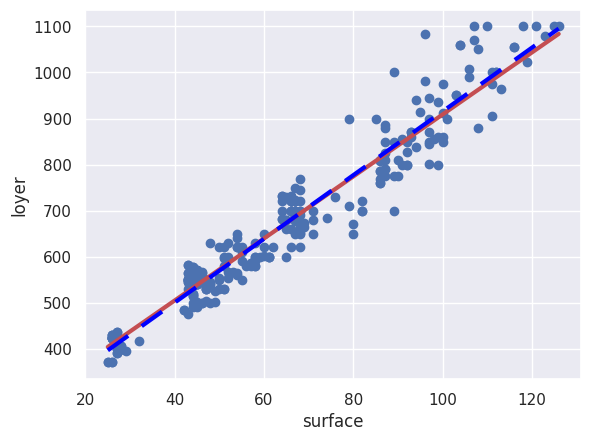

In [44]:
# paramètres fonctionnant pour les deux situations
if preprocessing:
    rate = 0.001
    nb_iterations = 60000
    # si nous relançons cette cellule, il faut re-transformer les x,y
    if inverted:
        x,y = transf(x,y)        
else:
    rate = 0.0001
    nb_iterations = 300000

theta_final, cost_history = gradient_descent(X,y,theta, learning_rate=rate, n_iterations=nb_iterations)
prediction = model(X, theta_final)

if preprocessing:    
    # on remet les valeurs dans leur domaine d'origine
    x, y = inv_transf(x, y)
    prediction = inv_transf_y(prediction)
    # mémoriser l'action
    inverted = True
    

plt.scatter(x,y)  # le nuage de points

plt.plot(x, prediction, c='r', lw=3)   # les prédictions qui viennent d'être faites
plt.plot(x, sci_predict, c='blue', lw=3, dashes=[6,4]) # les prédictions selon méthode précédente

ax = plt.gca()
ax.set_xlabel('surface')
ax.set_ylabel('loyer')
plt.show()

On contrôle la convergence de notre recherche.

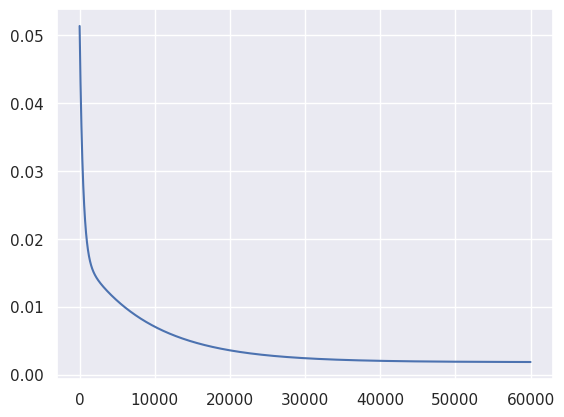

In [45]:
plt.plot(range(0,len(cost_history)), cost_history)

Calcul de la qualité de cette recherche.

In [46]:
def coef_determination(y, pred):
    u = np.square(y-pred).sum()
    v = np.square(y - y.mean()).sum()
    return 1 - u / v

coef = coef_determination(y, prediction)
print(f'Le coefficient de détermination de notre recherche est: {coef*100:.2f}%')

Le coefficient de détermination de notre recherche est: 93.97%


La convergence de la méthode du gradient est plus délicate avec les données non normées : il faut une vitesse de convergence plus petite et un plus grand nombre de pas pour assurer la convergence. On pourra faire des essais, mais penser à conserver les paramètres d'origine !

## Recherche avec des polynômes de degré supérieur

NON FINI : voir [fichier dédié](./02_regression_multilineaire.ipynb)


Nous avons du que l'on peut toujours utiliser cette méthode pour rechercher une solution avec un polynôme de degré supérieur.

Nous allons générer un jeux de données pour faire cette régression en utilisant la commande [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) du module [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) de Scikit-learn, une autre extension que nous allons présenter dans les prochains chapitres.

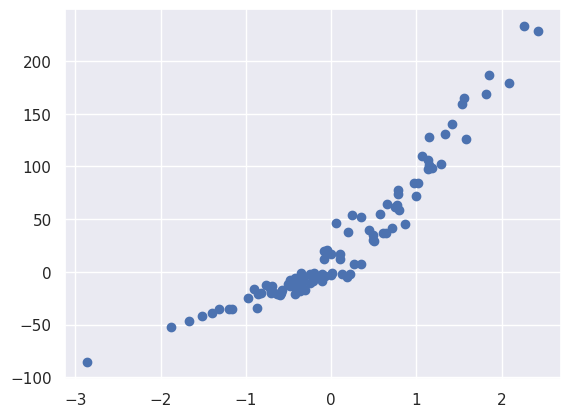

In [185]:
from sklearn.datasets import make_regression

x,y = make_regression(n_samples=100, n_features=1, noise=10, random_state=5)
y = y + abs(y/2)  # pour obtenir un forme glablement tordue

plt.scatter(x,y)
plt.show()

In [187]:
L = len(x)

# La matrice X contient 1, x, x**2
X = np.hstack((np.ones((L,1)), x, np.square(x)))
print(X.shape)
X[:4,:]

(100, 3)


array([[ 1.        , -0.43570392,  0.18983791],
       [ 1.        , -0.24071114,  0.05794185],
       [ 1.        ,  1.01842113,  1.0371816 ],
       [ 1.        ,  0.34691933,  0.12035302]])

In [188]:
theta = rng.random((3,1))
theta

array([[0.36906724],
       [0.37449677],
       [0.98744499]])

# Utiliser l'extension `SciKit Learn`



L'extension [SciKit Learn](https://scikit-learn.org/stable/index.html) offre plusieurs applications d'apprentissage automatique, dont la regression linéaire que nous venons de programmer. Mais bien sûr, cette extension est bien plus efficace que le programme que nous avons écrit plus haut. Cette extension possède [un sous module dédié aux regressions linéaires](https://scikit-learn.org/stable/modules/linear_model.html). 

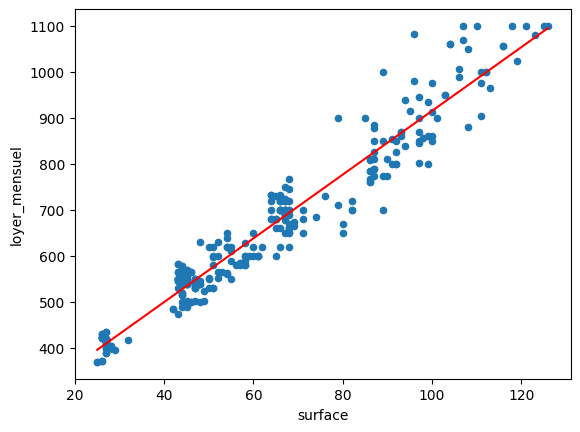

In [16]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(df[['surface']], df['loyer_mensuel'])

ax = df.plot.scatter(x='surface', y='loyer_mensuel', alpha=1)
ax.plot(df['surface'], lin.predict(df[['surface']]),c='red')

# Conclusion

La recherche d'une droite de régression linéaire peut être une première opportunité de tester un algorithme d'apprentissage automatique. L'extension [Scikit learn](https://scikit-learn.org/stable/modules/linear_model.html) montre qu'il y a bien d'autres possibilités.

Notre algorithme « fait maison » nous a aussi ouvert la mécanique interne de l'un de ces algorithmes d'apprentissages automatiques. Comme les autres, il inclue une méthode de recherche d'optimum, qui elle-même fait l'objet de beaucoup d'autres développements à une époque où on ne parlait pas encore d'apprentissage automatique.

